# Basic LSTM research, using made up data
Please do not use this in any production

In [27]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from matplotlib import pyplot as plt 
import pandas
import numpy as np

# Import data and visualize

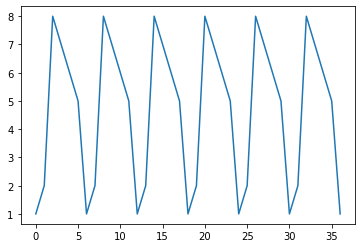

In [6]:
data = pandas.read_csv('basic_lstm.csv')
plt.plot(data)

# Data preprocessing
We got a time-series value of [1, 2, 5, 1, 2 ...],
obviously we should make it to X: [[1, 2, 5], [2, 5, 1], ...], Y: [1, 2] ...] 

In [71]:
window_size = 6
X = []
y = []
for i in range(0, len(data) - window_size):
    X.append(list(data['value'].iloc[i : i+window_size]))
    y.append(data['value'].iloc[i+window_size])
X = np.array(X)

arr_y = np.array(y)
labels = np.unique(y)

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
le = LabelEncoder()
le.fit(y)
le_y = np.array(le.transform(y))
le_y = le_y.reshape((-1, 1))
ohe.fit(le_y)

y = ohe.transform(le_y).toarray()
X = X.reshape(len(X), window_size, 1)
print('Shapes of X, y:', X.shape, y.shape)

Shapes of X, y: (31, 6, 1) (31, 6)


# Prepare model

In [72]:
model = Sequential(
    [
        LSTM(4, input_shape=(window_size, 1)),
        Dense(len(labels))
    ]
)
model.compile(loss="categorical_crossentropy", optimizer='adam')

# Train model

In [74]:
# Train model
model.fit(X, y, epochs=100)

Epoch 1/10
1/1 [==============================] - 0s 801us/step - loss: 5.4343
Epoch 2/10
1/1 [==============================] - 0s 965us/step - loss: 5.4096
Epoch 3/10
1/1 [==============================] - 0s 3ms/step - loss: 5.3861
Epoch 4/10
1/1 [==============================] - 0s 6ms/step - loss: 5.3605
Epoch 5/10
1/1 [==============================] - 0s 962us/step - loss: 5.3303
Epoch 6/10
1/1 [==============================] - 0s 1ms/step - loss: 8.4127
Epoch 7/10
1/1 [==============================] - 0s 2ms/step - loss: 8.3635
Epoch 8/10
1/1 [==============================] - 0s 3ms/step - loss: 8.3190
Epoch 9/10
1/1 [==============================] - 0s 1ms/step - loss: 5.7193
Epoch 10/10
1/1 [==============================] - 0s 3ms/step - loss: 5.7193


# Test model prediction

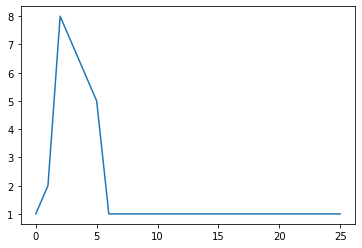

In [89]:
x_pred = np.array([1, 2, 8, 7, 6, 5])
# now plot prediction on models
y_result = list(x_pred.copy())
for i in range(0, 50):
    x = x_pred.reshape((1, -1, 1))
    vector = model.predict(x)[0]
    predict_y = labels[np.argmax(vector)]
    y_result.append(predict_y)
    # circle push-pop
    x_pred = np.delete(x_pred, 0)
    x_pred = np.append(x_pred, [predict_y])
plt.plot(y_result)